In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.16.1'

Loading the Cifar10 dataset

In [2]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Image normalization

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


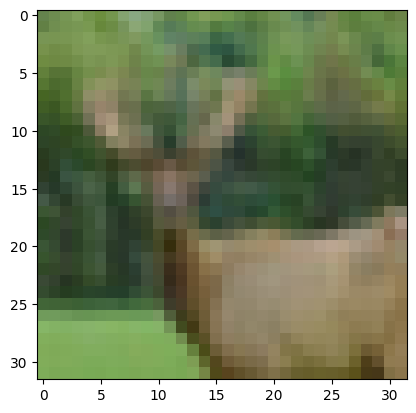

In [4]:
plt.imshow(X_test[876])

Defining the model

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()


/home/patrykwawrzyniak/Intern/06. Data Science/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

Training the model

In [7]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-04-03 11:42:49.949506: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - loss: 1.5906 - sparse_categorical_accuracy: 0.4193
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.9230 - sparse_categorical_accuracy: 0.6742
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - loss: 0.7112 - sparse_categorical_accuracy: 0.7514
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - loss: 0.5615 - sparse_categorical_accuracy: 0.8038
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - loss: 0.4481 - sparse_categorical_accuracy: 0.8421


Model evaluation and prediction

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7858 - sparse_categorical_accuracy: 0.7436
Test accuracy: 0.7404000163078308
